In [ ]:
import numpy as np
import pandas as pd
# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#Analisis
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr


In [ ]:
#datos
Puntaje_parcial = [60 , 74 , 66 , 34 , 60 , 66 , 57 , 71 , 39 , 57]
PP = np.array(Puntaje_parcial)
PP

array([60, 74, 66, 34, 60, 66, 57, 71, 39, 57])

In [ ]:
Puntaje_final = [72 , 82 , 75 , 46 , 73 , 74 , 70 , 82 , 60 , 61]
PF = np.array(Puntaje_final)
PF

array([72, 82, 75, 46, 73, 74, 70, 82, 60, 61])

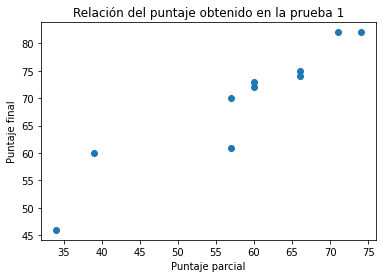

In [ ]:
#grafico de dispersión
plt.scatter(PP,PF)
plt.title("Relación del puntaje obtenido en la prueba 1")
plt.xlabel("Puntaje parcial")
plt.ylabel("Puntaje final")
plt.show()

In [ ]:
stats.pearsonr(PP, PF)
# primer dato valor del coeficiente de correlación, segundo dato valor P para probar la no correlación

(0.9416490441739458, 4.725314347618984e-05)

In [ ]:
#parámetros del módelo de regresión
prom_X = np.mean(PP)
prom_Y = np.mean(PF)
n = len(PP)
cov = np.sum(PP*PF)-(np.sum(PP)*np.sum(PF)/n)
SCXX = np.sum(PP**2)-(np.sum(PP)**2/n)
b1 = cov/SCXX
b0 = prom_Y-b1*prom_X
print(round(b1,3))
print(round(b0,3))
print(cov)
print(SCXX)


0.806
22.457
1207.0
1498.4000000000015


In [ ]:
#gráfica de la función lineal.
def lin_reg(PP):
    y_hat = (b1 * PP) + b0 #Aplicamos la forma de la regresión lineal
    return y_hat

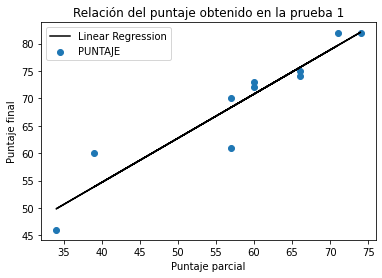

In [ ]:
plt.scatter(PP,PF,label="PUNTAJE") # Vamos a gráficar nuestros datos originales
plt.plot(PP,lin_reg(PP), color="black", label="Linear Regression") #Luego graficamos la curva ajustada
plt.title("Relación del puntaje obtenido en la prueba 1")
plt.xlabel("Puntaje parcial")
plt.ylabel("Puntaje final")
plt.legend()
plt.show()

In [ ]:
#GRAFICAR LOS ERRORES
print(PF)
print(lin_reg(PP))

[72 82 75 46 73 74 70 82 60 61]
[70.78884143 82.06620395 75.6219968  49.84516818 70.78884143 75.6219968
 68.37226375 79.64962627 53.87279765 68.37226375]


In [ ]:
E = PF-lin_reg(PP)
print(E)

[ 1.21115857 -0.06620395 -0.6219968  -3.84516818  2.21115857 -1.6219968
  1.62773625  2.35037373  6.12720235 -7.37226375]


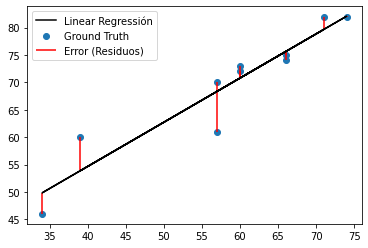

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(PP,lin_reg(PP), color="black", label="Linear Regressión")
ax.scatter(PP,PF, label="Ground Truth")

ax.vlines(PP, PF, lin_reg(PP), color="red", label="Error (Residuos)") #Gráficamos los Errores en cada punto.

plt.legend()
plt.show()

In [ ]:
COEF_DET=0.94**2 *100
COEF_DET


88.36

#Hipótesis para la significancia de la regresión

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import scipy.stats as st



In [ ]:
#cargar base
con_cer = pd.read_csv("Consumo_cerveja.csv")

In [ ]:
con_cer

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0,20.467


In [ ]:
con_cer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    int64  
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


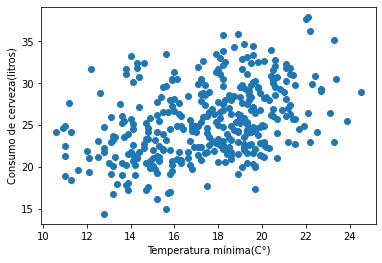

In [ ]:
plt.scatter(con_cer['Temperatura Minima (C)'],con_cer['Consumo de cerveja (litros)'])
plt.xlabel("Temperatura mínima(C°)")
plt.ylabel("Consumo de cerveza(litros)")

plt.show()

In [ ]:
X1 = con_cer['Temperatura Minima (C)']
y = con_cer['Consumo de cerveja (litros)'] # Variable dependiente.

In [ ]:
import statsmodels.formula.api as sfm
lm = sfm.ols(formula="y~X1",data=con_cer).fit()
#ols = "mínimos cuadrados ordinarios"
lm.params #parametros de la ecuación

Intercept    14.733070
X1            0.610966
dtype: float64

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     66.11
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           6.81e-15
Time:                        00:05:29   Log-Likelihood:                -1027.6
No. Observations:                 365   AIC:                             2059.
Df Residuals:                     363   BIC:                             2067.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.7331      1.329     11.085      0.000      12.119      17.347
X1             0.6110      0.075      8.131      0.000       0.463       0.759
==============================================================================
Omnibus:                       10.785   Durbin-Watson:                   1.467
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                9.809
Skew:                           0.342   Prob(JB):                      0.00741
Kurtosis:                       2.578   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

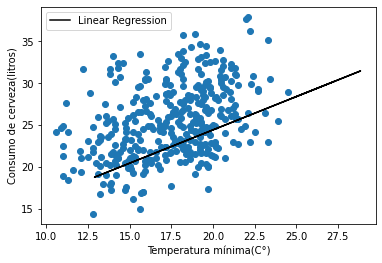

In [ ]:
#gráfica de la función lineal.
def lin_reg(X1):
    y_hat = (0.7949 * X1) + 8.5289 #Aplicamos la forma de la regresión lineal
    return y_hat
plt.scatter(con_cer['Temperatura Minima (C)'],con_cer['Consumo de cerveja (litros)'])
plt.xlabel("Temperatura mínima(C°)")
plt.ylabel("Consumo de cerveza(litros)")
plt.plot(X1,lin_reg(X1), color="black", label="Linear Regression") #Luego graficamos la curva ajustada
plt.legend()
plt.show()

# regresión múltiple

In [ ]:
X1 = con_cer['Temperatura Media (C)']
X2 = con_cer['Temperatura Minima (C)']
X3 = con_cer['Temperatura Maxima (C)']
X4 = con_cer['Precipitacao (mm)']
X5 = con_cer['Final de Semana'] #si era fin de semana o no, variable categorica
y = con_cer['Consumo de cerveja (litros)'] # Variable dependiente.

In [ ]:
import statsmodels.formula.api as sfm
lm1 = sfm.ols(formula="y~X1+X2+X3+X4+X5",data=con_cer).fit()
#ols = "mínimos cuadrados ordinarios"
lm1.params #parametros de la ecuación

Intercept    6.444696
X1           0.030796
X2          -0.019035
X3           0.656001
X4          -0.057469
X5           5.183181
dtype: float64

In [ ]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     187.1
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           1.19e-97
Time:                        22:01:29   Log-Likelihood:                -824.07
No. Observations:                 365   AIC:                             1660.
Df Residuals:                     359   BIC:                             1684.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4447      0.845      7.627      0.000       4.783       8.107
X1             0.0308      0.188      0.164      0.870      -0.339       0.401
X2            -0.0190      0.110     -0.172      0.863      -0.236       0.198
X3             0.6560      0.095      6.895      0.000       0.469       0.843
X4            -0.0575      0.010     -5.726      0.000      -0.077      -0.038
X5             5.1832      0.271     19.126      0.000       4.650       5.716
==============================================================================
Omnibus:                       39.362   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.936
Skew:                           0.153   Prob(JB):                      0.00155
Kurtosis:                       2.130   Cond. No.                         271.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

PLANTEAR HIPÓTESIS INDIVIDUALES

In [ ]:
#valores p para saber cual o cuales variables independientes son o no significativas para estimar Y
lm1.pvalues

Intercept    2.183417e-13
X1           8.699759e-01
X2           8.631543e-01
X3           2.443274e-11
X4           2.173492e-08
X5           1.006454e-56
dtype: float64

In [ ]:
#nuevo modelo sin las variables x1: temperatura media, x2: temperatura minima
base2= con_cer.drop(["Temperatura Media (C)","Temperatura Minima (C)"],axis=1)
base2

,Data,Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,32.5,0.0,0,25.461
1,2015-01-02,33.5,0.0,0,28.972
2,2015-01-03,29.9,0.0,1,30.814
3,2015-01-04,28.6,1.2,1,29.799
4,2015-01-05,28.3,0.0,0,28.900
...,...,...,...,...,...
360,2015-12-27,28.2,13.6,1,32.307
361,2015-12-28,26.7,0.0,0,26.095
362,2015-12-29,24.1,10.3,0,22.309
363,2015-12-30,22.4,6.3,0,20.467


In [ ]:
lm_2 = sfm.ols(formula="y~X3+X4+X5",data=base2).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     313.5
Date:                Wed, 07 Dec 2022   Prob (F-statistic):          3.85e-100
Time:                        22:01:29   Log-Likelihood:                -824.09
No. Observations:                 365   AIC:                             1656.
Df Residuals:                     361   BIC:                             1672.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4321      0.774      8.310      0.000       4.910       7.954
X3             0.6685      0.028     23.622      0.000       0.613       0.724
X4            -0.0575      0.010     -5.847      0.000      -0.077      -0.038
X5             5.1841      0.270     19.200      0.000       4.653       5.715
==============================================================================
Omnibus:                       38.795   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.850
Skew:                           0.153   Prob(JB):                      0.00162
Kurtosis:                       2.133   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#hipótesis individuales para el modelo 2   y=b0+b3x3+b4x4+b5x5
lm_2.pvalues

Intercept    1.956421e-15
X3           3.029358e-75
X4           1.119126e-08
X5           4.045208e-57
dtype: float64

#multicolinealidad (entre variables X)

In [ ]:
#cargar base
base1 = pd.read_excel("regremul.xlsx")
base1

,N de horas,Edad (años),Asignaturas,% rendimiento,Género,Área de Interés
0,3.8,26,4,85,Femenino,Comunicación
1,1.7,19,5,88,Masculino,Ciencias
2,1.7,18,4,40,Masculino,Comunicación
3,3.3,25,4,50,Femenino,Comunicación
4,3.9,24,4,57,Femenino,Comunicación
...,...,...,...,...,...,...
95,3.0,30,4,50,Femenino,Comunicación
96,2.0,29,4,20,Femenino,Ciencias
97,4.5,25,4,30,Femenino,Comunicación
98,2.0,22,4,10,Femenino,Tecnología


In [ ]:
# definir variables
y1 = base1['N de horas '] # Variable dependiente.
X_1 = base1['Edad (años)']
X_2 = base1['Asignaturas']
X_3 = base1['% rendimiento']
X_4 = base1['Género']
X_5 = base1['Área de Interés']


In [ ]:
import statsmodels.formula.api as sfm

In [ ]:

#regresión para el modelo  alfa 10%
lm_1 = sfm.ols(formula="y1~X_1+X_2+X_3+C(X_4)+C(X_5)",data=base1).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     49.46
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           7.82e-27
Time:                        18:39:51   Log-Likelihood:                -114.83
No. Observations:                 100   AIC:                             243.7
Df Residuals:                      93   BIC:                             261.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -7.6287      0.761    -10.026      0.000      -9.140      -6.118
C(X_4)[T.Masculino]        0.2430      0.161      1.512      0.134      -0.076       0.562
C(X_5)[T.Comunicación]     0.2448      0.204      1.198      0.234      -0.161       0.650
C(X_5)[T.Tecnología]       0.2641      0.224      1.178      0.242      -0.181       0.709
X_1                        0.4212      0.025     16.814      0.000       0.371       0.471
X_2                        0.0913      0.062      1.483      0.142      -0.031       0.214
X_3                        0.0044      0.004      1.154      0.252      -0.003       0.012
==============================================================================
Omnibus:                       23.239   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.038
Skew:                          -0.880   Prob(JB):                     3.70e-11
Kurtosis:                       5.904   Cond. No.                         711.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#matriz de correlación
mul_matrix = base1.corr(method='pearson')
mul_matrix

,N de horas,Edad (años),Asignaturas,% rendimiento
N de horas,1.000000,0.861830,0.169368,-0.067349
Edad (años),0.861830,1.000000,0.109255,-0.148769
Asignaturas,0.169368,0.109255,1.000000,0.036991
% rendimiento,-0.067349,-0.148769,0.036991,1.000000


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices


y1 , X=dmatrices('y1~X_1+X_2+X_3',base1, return_type="dataframe")  #solo para las variables cuantitativas
vif = pd.DataFrame() # crear un data frame vif
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] #crear columna con los valores del VIF
vif["variables"]=X.columns #crear columna con el nombre de las variables independientes
vif.round(3)

# recordar si el vif > 5 la variable presenta problemas de multicolinealidad

,VIF,variables
0,82.469,Intercept
1,1.037,X_1
2,1.015,X_2
3,1.026,X_3


In [ ]:
#como no hay problemas de multicolinealidad procedemos a los analisis individules
lm_1.pvalues

Intercept                 1.801911e-16
C(X_4)[T.Masculino]       1.339300e-01
C(X_5)[T.Comunicación]    2.338451e-01
C(X_5)[T.Tecnología]      2.416436e-01
X_1                       6.031485e-30
X_2                       1.415811e-01
X_3                       2.515667e-01
dtype: float64

In [ ]:
#modelo 2 y=b0+b1x1
lm_1a = sfm.ols(formula="y1~X_1",data=base1).fit()
lm_1a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     283.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           1.19e-30
Time:                        18:43:30   Log-Likelihood:                -118.59
No. Observations:                 100   AIC:                             241.2
Df Residuals:                      98   BIC:                             246.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.5562      0.615    -10.655      0.000      -7.777      -5.335
X_1            0.4177      0.025     16.821      0.000       0.368       0.467
==============================================================================
Omnibus:                       33.952   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.640
Skew:                          -1.133   Prob(JB):                     8.50e-23
Kurtosis:                       7.388   Cond. No.                         191.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('y1~X_1+X_2+X_3+C(X_4)+C(X_5)',
            data=base1).fit()

anova_result1 = sm.stats.anova_lm(model, typ=2) #tabla anova para encontrar sce y los grados de libertad del primer modelo
print(anova_result1)

model1 = ols('y1~X_1',
            data=base1).fit()

anova_result2 = sm.stats.anova_lm(model1, typ=2)  #tabla anova para encontrar sce y los grados de libertad del segundo modelo
print(anova_result2)

              sum_sq    df           F        PR(>F)
C(X_4)      1.430695   1.0    2.286080  1.339300e-01
C(X_5)      1.092227   2.0    0.872624  4.212464e-01
X_1       176.930158   1.0  282.713252  6.031485e-30
X_2         1.375500   1.0    2.197884  1.415811e-01
X_3         0.833039   1.0    1.331096  2.515667e-01
Residual   58.202099  93.0         NaN           NaN
              sum_sq    df           F        PR(>F)
X_1       181.169178   1.0  282.954029  1.190221e-30
Residual   62.747222  98.0         NaN           NaN


In [ ]:
cme1=58.2021/93
cme2=62.747/98
print(cme1)
print(cme2)

0.6258290322580645
0.6402755102040816


#Supuestos que debe cumplir el modelo de regresión

1) Test de White

h0: Existe homocedasticidad en los residuos de los errores
h1: Existe heterocedasticidad en los residuos de los errores

2) Test de normalidad de los residuos (Jarque-Bera (JB):	48.038)

se puede apreciar en el resumen (ver summary ) de los datos que hicimos anteriormente.

3) Test de autocorrelación

aplicado en el modelo y1 =X_1+X_2+X_3+X_4+X_5

In [ ]:
from statsmodels.stats.diagnostic import het_white # import test de white
white_test =het_white(model.resid, model.model.exog) #crear variable del test para aplicar modelo de white
labels = ['LM Statistic', 'Lm-Test p-value'] #estadístico de prueba y p valor
print(dict(zip(labels,white_test)))

{'LM Statistic': 56.04202495282491, 'Lm-Test p-value': 0.00013964044740193642}


Normalidad de los residuos

estadístico de prueba: Jarque-Bera (JB): 48.038

valor p: Prob(JB):	3.70e-11

Test de Durbin - Watson

H0 : p=0
H1 : p>0

Durbin-Watson:	1.825=d

tenemos 5 regresores
alfa 0.05
valores de tabla
dL: 1.57
du: 1.78

1.78 < d < 2.22  -> no existe autocorrelación


In [ ]:
#aplicar los supuestos en el modelo 2 y=x1 test de white
white_test2 =het_white(model1.resid, model1.model.exog)
labels = ['LM Statistic', 'Lm-Test p-value']
print(dict(zip(labels,white_test2)))

{'LM Statistic': 20.515985186989194, 'Lm-Test p-value': 3.50760290623219e-05}



Test de Durbin - Watson

H0 : p=0 H1 : p>0

Durbin-Watson: 1.812=d

tenemos 5 regresores alfa 0.05 valores de tabla dL: 1.59 du: 1.63

1.63 < d < 2.37 -> no existe autocorrelación